## Fast Fourier Transform Function

Takes ak's, $\vec{a}$, returns data, $\vec{p}$.

p = fft(a)

$\vec{p} = \mathcal{F} \vec{a}$

## Inverse Fast Fourier Transform Function

Takes data, returns ak's.

a = ifft(p)

$\vec{a} = \mathcal{F}^{-1} \vec{p}$

Text(0.5, 1.0, 'Purdue COVID-19 Testing')

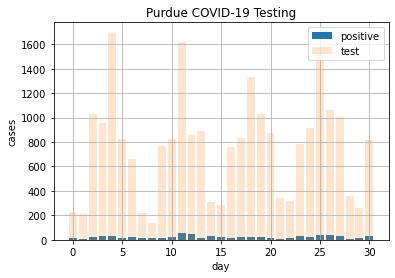

In [1]:
from pylab import *
daily_positive = array([11, 8, 24, 32, 30, 16, 26, 11, 15, 18, 26, 54, 46, 18,
                34, 23, 16, 22, 24, 21, 12, 4, 16, 28, 26, 36, 40, 32, 8, 11, 28])
daily_test = array([231, 209, 1028, 957, 1695, 828, 660, 222, 134,
                    764, 828, 1616, 855, 893, 313, 287, 759, 833, 1331,
                    1026, 876, 343, 316, 785, 911, 1533, 1061, 1005, 361, 259, 819])
tau = len(daily_positive) # total period, is 31 days
nu = len(daily_positive)  # number of samples is the same, 31 samples
day = range(tau)  # time vector, in days

bar(day, daily_positive, label='positive')
bar(day, daily_test, alpha=0.2, label='test')
xlabel('day')
ylabel('cases')
legend()
grid()
title('Purdue COVID-19 Testing')

dominant period 7.75 days


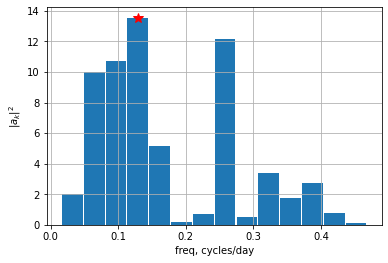

In [13]:
ak = ifft(daily_positive)
power = abs(ak)**2
freq = fftfreq(nu, 1)
bar(freq[1:nu//2], power[1:nu//2], width=0.95/nu)
grid()
xlabel('freq, cycles/day')
ylabel('$|a_k|^2$');
i_max = argmax(power[1:]) + 1 
plot(freq[i_max], power[i_max], 'r*', markersize=10)
print('dominant period {:g} days'.format(1.0/freq[i_max]))

In [4]:
conj(fft(daily_positive))/nu

array([23.09677419-0.j        , -1.07648864+0.91547276j,
       -0.61118665-3.10011436j, -1.57372103+2.86877763j,
       -2.73485886+2.46467996j,  1.47336626-1.7219879j ,
        0.43017549-0.14123705j, -0.40325598-0.72851355j,
        0.893105  -3.3739671j , -0.59667952-0.40027767j,
       -1.04783983-1.51513434j,  1.27880379+0.32661385j,
       -1.63310493+0.23080575j, -0.62839947-0.62663979j,
       -0.36641573-0.02147487j,  0.54811299-0.53075382j,
        0.54811299+0.53075382j, -0.36641573+0.02147487j,
       -0.62839947+0.62663979j, -1.63310493-0.23080575j,
        1.27880379-0.32661385j, -1.04783983+1.51513434j,
       -0.59667952+0.40027767j,  0.893105  +3.3739671j ,
       -0.40325598+0.72851355j,  0.43017549+0.14123705j,
        1.47336626+1.7219879j , -2.73485886-2.46467996j,
       -1.57372103-2.86877763j, -0.61118665+3.10011436j,
       -1.07648864-0.91547276j])

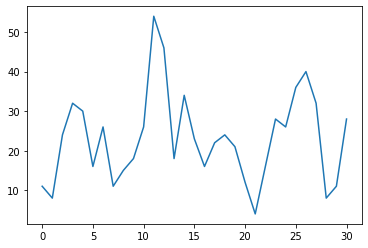

In [5]:
plot(day, daily_positive)

In [6]:
mean(daily_positive)

23.096774193548388

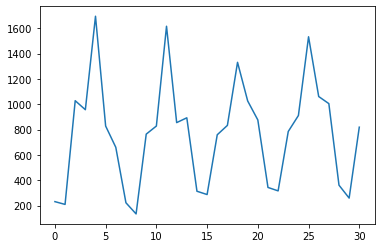

In [7]:
plot(day, daily_test)

dominant period 7.75 days


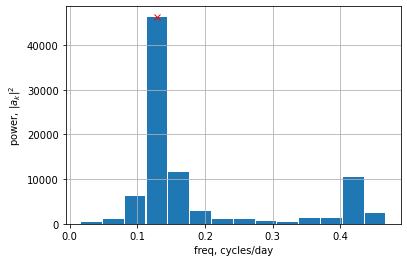

In [8]:
ak = ifft(daily_test)
power = abs(ak**2)
freq = fftfreq(nu, 1)
bar(freq[1:nu//2], power[1:nu//2], width=0.95/nu)
i_max = argmax(power[1:]) + 1
plot(freq[i_max], power[i_max], 'rx')
xlabel('freq, cycles/day')
ylabel('power, $|a_k|^2$')
grid()
print('dominant period {:g} days'.format(1.0/freq[i_max]))

Text(0, 0.5, 'percent positive')

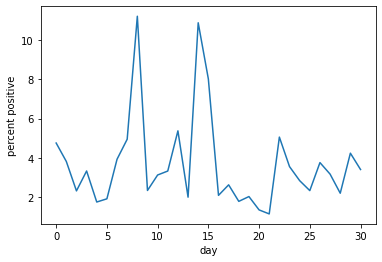

In [9]:
positive_ratio = daily_positive/daily_test
plot(day, 100*positive_ratio)
xlabel('day')
ylabel('percent positive')

dominant period 7.75 days


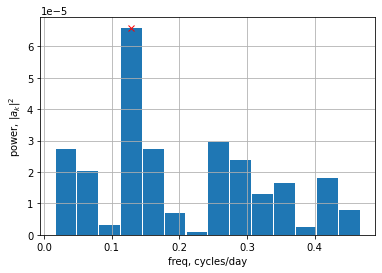

In [10]:
ak = ifft(positive_ratio)
power = abs(ak**2)
freq = fftfreq(nu, 1)
bar(freq[1:nu//2], power[1:nu//2], width=0.95/nu)
i_max = argmax(power[1:]) + 1
plot(freq[i_max], power[i_max], 'rx')
xlabel('freq, cycles/day')
ylabel('power, $|a_k|^2$')
grid()
print('dominant period {:g} days'.format(1/freq[i_max]))